## Testing Trades

In [244]:
import os
import random
import numpy as np
import pandas as pd
from pylab import mpl, plt
import pandas_datareader.data as web
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
register_matplotlib_converters()
import seaborn as sns

In [224]:
company = 'TCS.NS'
data = web.DataReader(company, 'yahoo', '2017-01-01','2022-10-30')

In [225]:
# data = web.DataReader(company, 'yahoo', '2016-01-01','2022-10-30')
# data['return'] = np.log(data['Close'] / data['Close'].shift(1))
# lags = 5
# cols = []

# for lag in range(1, lags+1):
#     col = f'lag_{lag}'
#     data[col] = data['Close'].shift(lag)
#     cols.append(col)
# data.dropna(inplace=True)

In [226]:
# lags = 5
# cols = []

# for lag in range(1, lags+1):
#     col = f'lag_{lag}'
#     data[col] = data['Close'].shift(lag)
#     cols.append(col)
# data.dropna(inplace=True)

In [227]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-10-03,3020.699951,2974.000000,2995.000000,2984.949951,1763331.0,2984.949951
2022-10-04,3098.000000,3023.000000,3029.949951,3091.149902,2145875.0,3091.149902
2022-10-06,3124.000000,3092.449951,3111.000000,3101.949951,1790816.0,3101.949951
2022-10-07,3105.000000,3058.100098,3097.399902,3064.899902,1939879.0,3064.899902
2022-10-10,3127.000000,3005.000000,3010.000000,3118.550049,3062991.0,3118.550049


In [228]:
# Calculate the Moving average of closing price

data['SMA1'] = data['Close'].rolling(window=20).mean()
data['SMA2'] = data['Close'].rolling(window=100).mean()

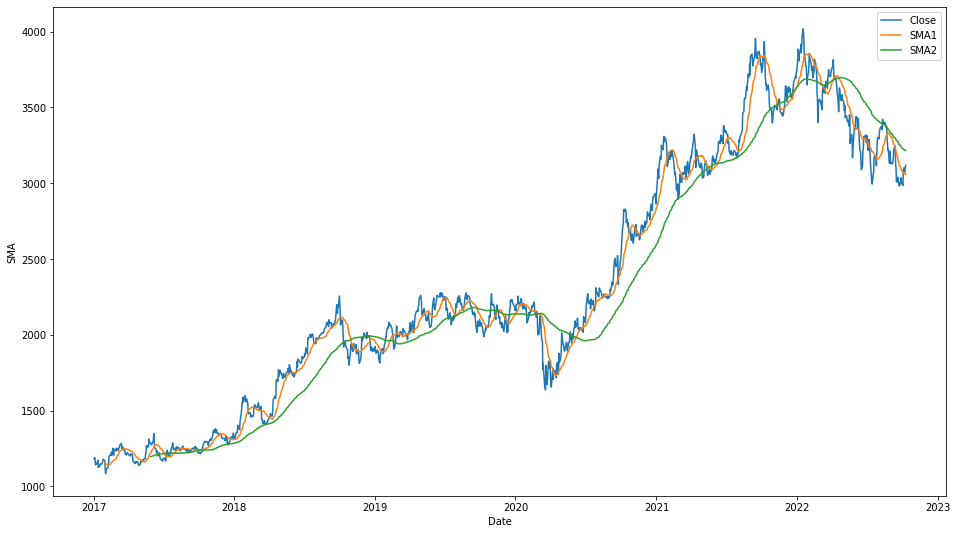

In [229]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(data.index, data['Close'], label = 'Close')

ax.plot(data['SMA1'].index, data['SMA1'], label= 'SMA1')
ax.plot(data['SMA2'].index, data['SMA2'], label= 'SMA2')
ax.set_xlabel('Date')
ax.set_ylabel('SMA')
ax.legend()

In [230]:
wipro = data['Close']
wipro_df = pd.DataFrame(wipro)

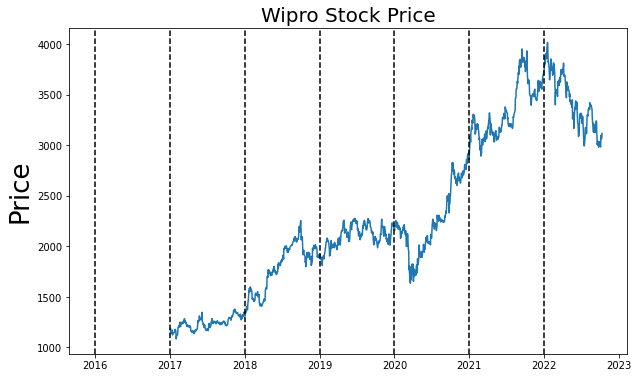

In [231]:
plt.figure(figsize = (10,6))
plt.plot(wipro_df.Close)
plt.title(f"Wipro Stock Price", fontsize=20)
plt.ylabel("Price", fontsize=26)
for year in range(2016,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color= 'k',linestyle='--')


# Stationary: take first difference of the series

In [232]:
# take first difference
first_diff = wipro_df.Close.values[1:] - wipro_df.Close.values[:-1]
first_diff = np.concatenate([first_diff, [0]])

In [233]:
# set first differnce as variable in dataframe
wipro_df['first_difference'] = first_diff

In [234]:
wipro_df.head()

,Close,first_difference
Date,,
2017-01-02,1180.675049,3.449951
2017-01-03,1184.125000,5.625000
2017-01-04,1189.750000,-22.550049
2017-01-05,1167.199951,-26.500000
2017-01-06,1140.699951,11.150024


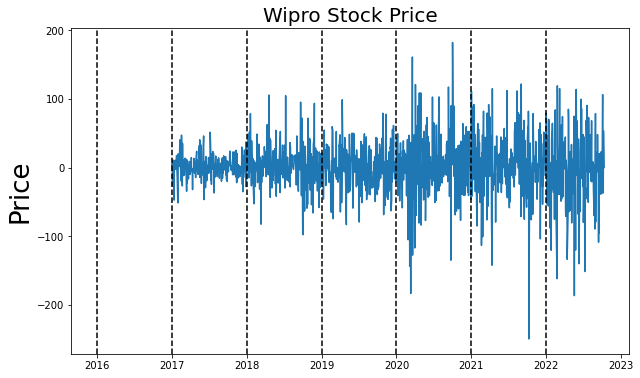

In [235]:
plt.figure(figsize = (10,6))
plt.plot(wipro_df.first_difference)
plt.title(f"Wipro Stock Price", fontsize=20)
plt.ylabel("Price", fontsize=26)
for year in range(2016,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color= 'k',linestyle='--')


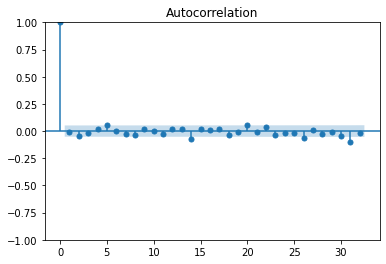

In [236]:
acf_plot = plot_acf(wipro_df.first_difference)

C:\Users\NEXT\miniconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


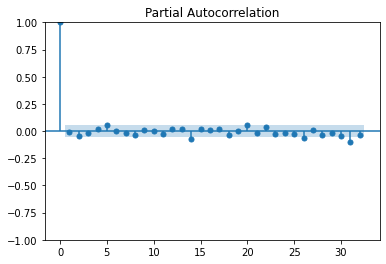

In [237]:
pacf_plot = plot_pacf(wipro_df.first_difference)

In [238]:
data_swing_month = pd.DataFrame(data["Close"])
data_swing_month

,Close
Date,
2017-01-02,1180.675049
2017-01-03,1184.125000
2017-01-04,1189.750000
2017-01-05,1167.199951
2017-01-06,1140.699951
...,...
2022-10-03,2984.949951
2022-10-04,3091.149902
2022-10-06,3101.949951


In [239]:
data_swing_month['year'] = [d.year for d in data_swing_month.index]
data_swing_month['month'] = [d.strftime('%b') for d in data_swing_month.index]
years = data_swing_month['year'].unique()

In [240]:
data_swing_month.head()

,Close,year,month
Date,,,
2017-01-02,1180.675049,2017,Jan
2017-01-03,1184.125000,2017,Jan
2017-01-04,1189.750000,2017,Jan
2017-01-05,1167.199951,2017,Jan
2017-01-06,1140.699951,2017,Jan


In [241]:
# prep colors
np.random.seed(300)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

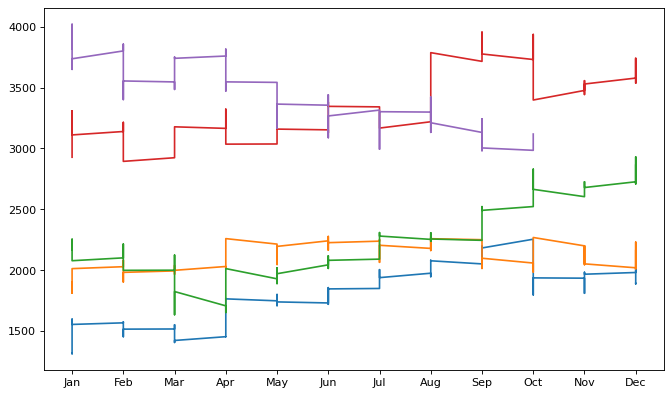

In [242]:
# Draw plot
plt.figure(figsize=(10,6), dpi = 80)
for i, y in enumerate(years):
    if i >0:
        plt.plot('month', 'Close', data=data_swing_month.loc[data_swing_month.year==y,:], label=y)
#         plt.text(data_swing_month.loc[data_swing_month.year==y,:].shape[0]-.9, data_swing_month.loc[data_swing_month.year==y,'Close'][-1:].values[0],y,fontsize=12, color=mycolors[i])

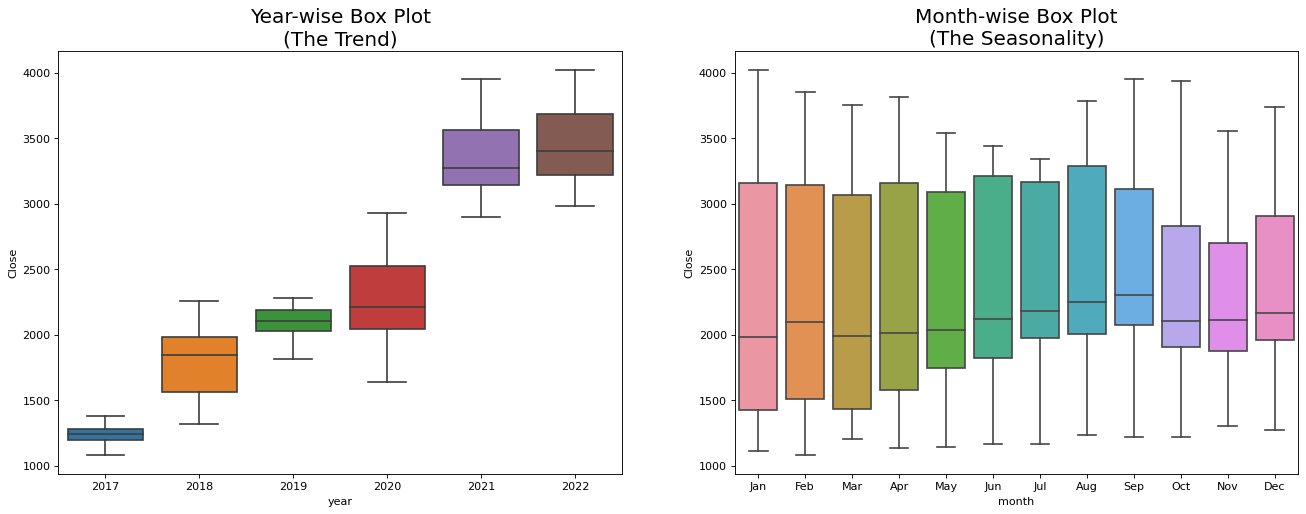

In [245]:
# Import Data
# df = pd.read_csv('../data/ts_data_2.csv', parse_dates=['date'])
# # df.reset_index(inplace=True)

# # Prepare data
# df['year'] = [d.year for d in df.date]
# df['month'] = [d.strftime('%b') for d in df.date]
# years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Close', data=data_swing_month, ax=axes[0])
sns.boxplot(x='month', y='Close', data=data_swing_month.loc[~data_swing_month.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()